# CUSTOMER SEGMENTATION
This case is about customer segmentation in a mall where they want to find out that which customer spending more time or buying items more in a mall.

## ATTRIBUTE INFORMATION:
1.Customer Id : Id of the customer<br>
2.Gender:Male and Female<br>
3.Age:Customer's age<br>
4.Annual Income:Annual Income of customer in thousands of dollar<br>
5.Spending Score(1-100):Spending Time by customer in score<br> 

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [15]:
data=pd.read_csv("Mall_Customers.csv")

In [16]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### If spending score is greater than 70 means customer buys more item by spending more time in mall. 

In [17]:
data.shape

(200, 5)

In [18]:
# getting some information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.1+ KB


### Checking missing values

In [19]:
data.isnull().values.any()

False

In [20]:
x=data.iloc[:,[3,4]].values

In [21]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

## choosing the number of cluster
wcss(within cluster sum of squares)-distance between each data points and their centroid of those cluster.
for correct number of clusters wcss value should be less.


In [22]:
wcss=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### PLOT
We use elbow method to get the number of clusters ,we take k value for which wcss value is less.

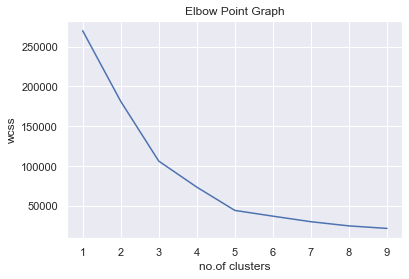

In [23]:
#plotting
sns.set()# it will give basic parameters for graph
plt.plot(range(1,10),wcss)
plt.title("Elbow Point Graph")
plt.xlabel("no.of clusters")
plt.ylabel("wcss")
plt.show()

In [24]:
#optimum number of clusters=5
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)
y=kmeans.fit_predict(x)


In [25]:
print(y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


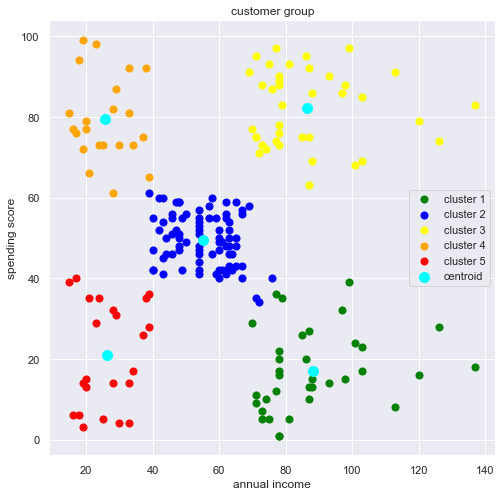

In [27]:
#clusters=0,1,2,3,4
#visualizing all the clusters
#plotting all the clusters and their centroids
plt.figure(figsize=(8,8))
plt.scatter(x[y==0,0],x[y==0,1],s=50,c='green',label="cluster 1")
plt.scatter(x[y==1,0],x[y==1,1],s=50,c='blue',label="cluster 2")
plt.scatter(x[y==2,0],x[y==2,1],s=50,c='yellow',label="cluster 3")
plt.scatter(x[y==3,0],x[y==3,1],s=50,c='orange',label="cluster 4")
plt.scatter(x[y==4,0],x[y==4,1],s=50,c='red',label="cluster 5")
plt.grid(True)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='cyan',label="centroid")
plt.title("customer group")
plt.xlabel("annual income")
plt.ylabel("spending score")
plt.legend(loc='best')
plt.show()

# CONCLUSION:
From above plot it is clear that orange cluster have less annual income and also they are spending less time on the otherhand the green group is having more annual income but they are also spending less time ,so the mall will provide some more offers or membership cards to the green and orange group to make them spend more time in the mall.